In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np

import scipy.io.wavfile
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import librosa.display

from pathlib import PurePath
from tqdm.notebook import tqdm

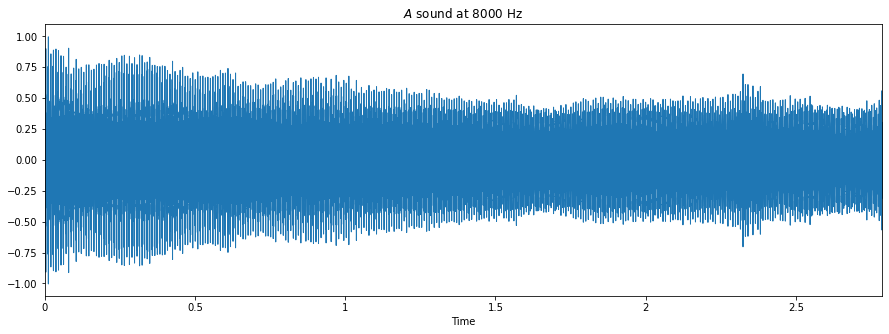

In [ ]:
path_a = PurePath("/content/drive/Shared drives/PASA/TP3 PREDICTOR/Prueba 1/a.wav")
fs, a_wav = scipy.io.wavfile.read(path_a)

#Make sure the process is zero mean
a_wav = a_wav - np.mean(a_wav)
a_wav = a_wav/np.max(np.abs(a_wav))

plt.figure(figsize=(15,5))
plt.title(f"$A$ sound at {fs} Hz")
librosa.display.waveplot(a_wav, sr=fs);

In [ ]:
from scipy.linalg import toeplitz
from scipy.linalg import solve_toeplitz
from scipy.linalg import inv 
from scipy.linalg import eigvals

def do_corr(in1, in2):
  r = signal.correlate(in1, in2, mode='same') / max(len(in1),len(in2))

def compute_Jmin(desired, p, wo):
  desired_energy = np.var(desired)
  Jmin = desired_energy - np.dot(p,wo)
  return Jmin

def solve_wienerhopf(input, desired, M):
  r = do_corr(input, input)
  p = do_corr(input, desired)
  # Compute input autocorrelation
  # center_r = len(r)//2
  # r_M = r[center_r:center_r+M]
  # p_center = len(p)//2
  # p_M = p[p_center: p_center+M]
  # R = toeplitz(r_M)

  center_r = len(r)//2
  r_M = r[center_r: center_r+M]
  p_center = len(p)//2
  p_M = np.flip(p[p_center: p_center+M])

  # wo = np.matmul(inv(R), p_M)
  wo = solve_toeplitz(r_M, p_M)
  Jmin = compute_Jmin(desired, p_M, wo)
  return wo, Jmin
  
def apply_filter(input, wo):
  return signal.convolve(input, wo, mode="same")
  # return signal.filtfilt(wo,[1], input)
  

def calc_eigenvalues (signal, M):
  r = do_corr(signal, signal)
  center_r = len(r)//2
  r_M = r[center_r: center_r+M]
  R = toeplitz(r_M)
  egs = eigvals(R)
  return egs 

In [ ]:
# solve_wienerhopf([1,2,3,4,5,6], [2,3,4,5,6,7], 4)

In [ ]:
filtro_1_test = [10,9,8,7,6,5,4,3,2,1] # Filtro 
filtro_1_test = filtro_1_test
filtrada_custom_1_test = apply_filter(a_wav, filtro_1_test) #Filtramos una pista de audio 
wo_1_test, _ = solve_wienerhopf(a_wav, filtrada_custom_1_test, 5000) #Pedimos un filtro de orden 4000 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


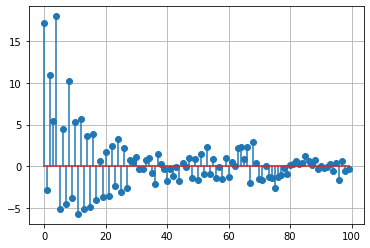

In [ ]:
plt.grid()
plt.stem(wo_1_test[0:100])
plt.show()

In [ ]:
a_wav_r = np.roll(a_wav,1)
a_wav_r[0] = 0
predict_wo, Jminp = solve_wienerhopf(a_wav, a_wav_r, 200) #Pedimos un filtro de orden 4000 

In [ ]:
Jminp


0.000408839910655559

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


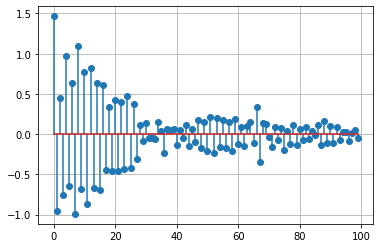

In [ ]:
plt.grid()
plt.stem(predict_wo)
plt.show()

In [ ]:
predicted = apply_filter(a_wav,predict_wo)
from IPython.display import Audio
Audio(predicted, rate=8000)

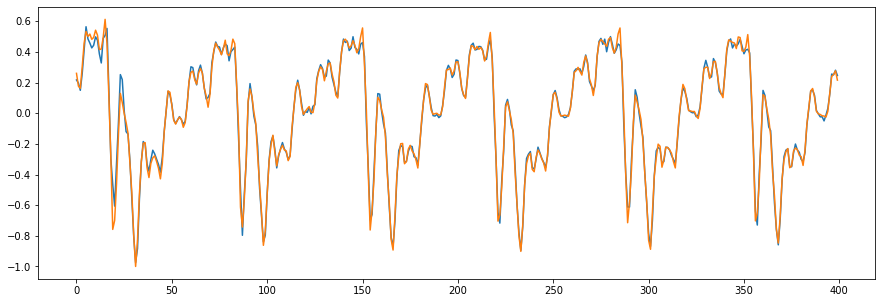

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(predicted[0:400]);
plt.plot(a_wav[50:450]);

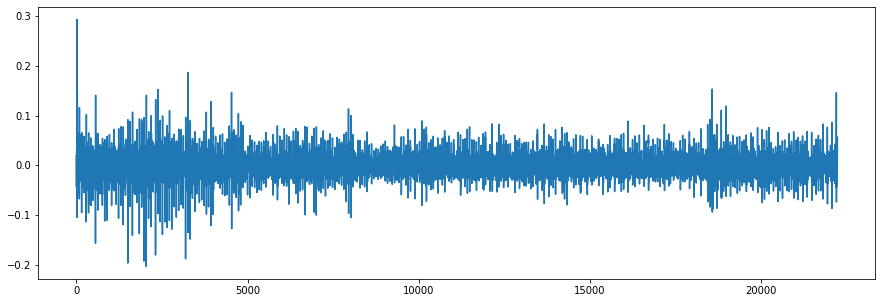

In [ ]:
e = predicted[0:-50] - a_wav[50:]
plt.figure(figsize=(15,5))
plt.plot(e)

In [ ]:
import seaborn as sn

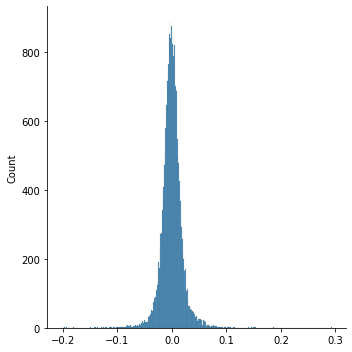

In [ ]:
sn.displot(e)